In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [45]:
train_df.head()

# identifier: 'sessionID', 'userID'

# continous: 'TARGET'(dependent), 'quality', 'duration', 'transaction', 'transaction_revenue'

# category: 'browser', 'OS', 'device', 'country','continent', 'subcontinent', 'traffic_source', 'traffic_medium', 'keyword', 'referral_path'
# binary: 'new','bounced'

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


# Pre-processing

In [46]:
# drop columns with missing values: 'referral_path','keyword'
x_train =  train_df.drop(['TARGET','sessionID','userID'], axis=1)
y_train = train_df['TARGET']
test_df= test_df.drop(['sessionID','userID'],axis=1)

## Grouping: traffic_source

In [47]:
cols = ['google', 'youtube', 'baidu', 'facebook', 'yahoo', 'bing', 'quora', 'quiita', 'Partners', 'reddit']

# test
for col in cols:
    x_train.loc[x_train['traffic_source'].str.contains(col), 'traffic_source'] = col

# train 
for col in cols:
    test_df.loc[test_df['traffic_source'].str.contains(col), 'traffic_source'] = col

In [48]:
counts = x_train['traffic_source'].value_counts()
for value, count in counts.items():
    print(f"{value}: {count}")

google: 129283
(direct): 59026
youtube: 52876
Partners: 5369
facebook: 747
bing: 704
reddit: 683
qiita.com: 548
quora: 503
baidu: 474
dfa: 436
away.vk.com: 379
yahoo: 301
blog.golang.org: 186
dealspotr.com: 93
lunametrics.com: 81
duckduckgo.com: 75
t.co: 64
linkedin.com: 45
sashihara.jp: 44
int.search.tb.ask.com: 39
aulagrado.esic.edu: 36
outlook.live.com: 31
online-metrics.com: 26
ask: 25
pinterest.com: 21
l.messenger.com: 17
phandroid.com: 17
learn.pct.edu: 16
msn.com: 15
myasucourses.asu.edu: 11
vk.com: 11
arstechnica.com: 8
github.com: 7
r.search.aol.com: 7
bluequill.franklin.edu: 6
s0.2mdn.net: 6
gophergala.com: 6
search.xfinity.com: 5
evernote.com: 4
web.whatsapp.com: 4
search.tb.ask.com: 3
startpage.com: 3
businessinsider.com: 3
search.1and1.com: 3
it.pinterest.com: 3
online.fullsail.edu: 3
learn.colorado.edu: 3
go.mail.ru: 2
wikihow.com: 2
search.mysearch.com: 2
chatwork.com: 2
blackboard.bentley.edu: 2
kik.com: 2
getpocket.com: 2
lisham-web.blogspot.com: 1
search.snapdo.com: 1

## New Category: 'others'

In [49]:
cols = ['browser', 'OS', 'subcontinent', 'traffic_source']

threshold = 100

for col in cols:
    x_train[col] = x_train[col].where(x_train[col].map(x_train[col].value_counts()) >= threshold, 'others')
    
for col in cols:
    test_df[col] = test_df[col].where(test_df[col].map(test_df[col].value_counts()) >= threshold, 'others')

## keyword 및 refferal_path 처리

In [50]:
import re

def extract_category(keyword):
    if isinstance(keyword, str):
        match = re.search(r'Category\d+', keyword)
        if match:
            return match.group(0)
    return keyword

x_train['keyword'] = x_train['keyword'].apply(extract_category)
x_train['keyword'] = x_train['keyword'].fillna('others')
x_train['keyword'].unique()

test_df['keyword'] = test_df['keyword'].apply(extract_category)
test_df['keyword'] = test_df['keyword'].fillna('others')

In [51]:
x_train['referral_path'] = x_train['referral_path'].apply(extract_category)
x_train['referral_path'] = x_train['referral_path'].fillna('Others')
x_train['referral_path'].unique()

array(['Others', 'Category6', 'Category7', 'Category5', 'Category11',
       'Category8', 'Category9', 'Category13', 'Category1', 'Category2',
       'Category3', 'Category4', 'Category12', 'Category10'], dtype=object)

In [52]:
test_df['referral_path'] = test_df['referral_path'].apply(extract_category)
test_df['referral_path'] = test_df['referral_path'].fillna('Others')
test_df['referral_path'].unique()

array(['Category1', 'Others', 'Category2', 'Category11', 'Category3',
       'Category10', 'Category6', 'Category8', 'Category5', 'Category12',
       'Category13', 'Category7', 'Category9', 'Category4'], dtype=object)

In [53]:
test_df.head()

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),others,Category1
1,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,Others
2,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube,referral,others,Category2
3,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,Others
4,Internet Explorer,others,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube,referral,others,Category11


## Encoding

In [54]:
# oneHotEncoder vs binaryEncoder

from sklearn.preprocessing import OneHotEncoder  

categories = ['browser', 'OS', 'device', 'country','continent', 'subcontinent', 'traffic_source', 'traffic_medium', 'referral_path', 'keyword']

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')   # drop = 'first'

train_encoded_df = pd.DataFrame(encoder.fit_transform(x_train[categories]) , columns=encoder.get_feature_names_out(categories))
display(train_encoded_df.head())

try :
    test_encoded_df = pd.DataFrame(encoder.transform(test_df[categories]), columns=encoder.get_feature_names_out(categories))
    display(test_encoded_df.head())

except Exception as e:
    print(f"Error : {e}")

C:\Users\taeho\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category12,keyword_Category2,keyword_Category3,keyword_Category4,keyword_Category5,keyword_Category6,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category12,keyword_Category2,keyword_Category3,keyword_Category4,keyword_Category5,keyword_Category6,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## z-score normalization

In [55]:
from sklearn.preprocessing import StandardScaler

continuous_col = ['quality', 'duration', 'transaction', 'transaction_revenue']

# train
scaler = StandardScaler()
train_scaled_df = pd.DataFrame(scaler.fit_transform(x_train[continuous_col]), index=x_train.index, columns=continuous_col)
display(train_scaled_df.head())

# test
test_scaled_df = pd.DataFrame(scaler.transform(test_df[continuous_col]), index=test_df.index, columns=continuous_col)
display(test_scaled_df.head())

,quality,duration,transaction,transaction_revenue
0,3.713206,2.193865,-0.089494,-0.042587
1,-0.253972,-0.223964,-0.089494,-0.042587
2,-0.253972,-0.341833,-0.089494,-0.042587
3,-0.253972,-0.341833,-0.089494,-0.042587
4,-0.253972,-0.341833,-0.089494,-0.042587


,quality,duration,transaction,transaction_revenue
0,6.418101,1.767722,-0.089494,-0.042587
1,-0.253972,-0.341833,-0.089494,-0.042587
2,-0.253972,-0.242098,-0.089494,-0.042587
3,-0.253972,-0.112140,-0.089494,-0.042587
4,-0.163809,0.782457,-0.089494,-0.042587


## Final Dataset

In [56]:
# merge all selected columns
x_train_fin = pd.concat([train_encoded_df, train_scaled_df,  train_df[['bounced', 'new']]], axis=1)
display(x_train_fin.head())

x_test_fin = pd.concat([test_encoded_df, test_scaled_df,  test_df[['bounced', 'new']]], axis=1)
display(x_test_fin.head())

,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others,quality,duration,transaction,transaction_revenue,bounced,new
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.713206,2.193865,-0.089494,-0.042587,0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.223964,-0.089494,-0.042587,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,0


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others,quality,duration,transaction,transaction_revenue,bounced,new
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.418101,1.767722,-0.089494,-0.042587,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.341833,-0.089494,-0.042587,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.242098,-0.089494,-0.042587,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.112140,-0.089494,-0.042587,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.163809,0.782457,-0.089494,-0.042587,0,1


In [57]:
# 비율 및 비율 변환
x_train_fin['avg_transaction_revenue'] = x_train_fin['transaction_revenue'] / x_train_fin['transaction']
x_test_fin['avg_transaction_revenue'] = x_test_fin['transaction_revenue'] / x_test_fin['transaction']

# 합산 및 차분
x_train_fin['total_engagement'] = x_train_fin['quality'] + x_train_fin['duration'] + x_train_fin['transaction']
x_test_fin['total_engagement'] = x_test_fin['quality'] + x_test_fin['duration'] + x_test_fin['transaction']

# 상호작용 및 다항식 생성
x_train_fin['quality_duration_interaction'] = x_train_fin['quality'] * x_train_fin['duration']
x_test_fin['quality_duration_interaction'] = x_test_fin['quality'] * x_test_fin['duration']

# 추가 변수 생성
x_train_fin['quality_div_duration'] = x_train_fin['quality'] / x_train_fin['duration']
x_test_fin['quality_div_duration'] = x_test_fin['quality'] / x_test_fin['duration']

x_train_fin['quality_squared'] = x_train_fin['quality'] ** 2
x_test_fin['quality_squared'] = x_test_fin['quality'] ** 2

x_train_fin['duration_mul_quality'] = x_train_fin['duration'] * x_train_fin['quality']
x_test_fin['duration_mul_quality'] = x_test_fin['duration'] * x_test_fin['quality']

# 추가적인 변수 조합
x_train_fin['engagement_div_transaction'] = x_train_fin['total_engagement'] / x_train_fin['transaction']
x_test_fin['engagement_div_transaction'] = x_test_fin['total_engagement'] / x_test_fin['transaction']

x_train_fin['quality_div_transaction'] = x_train_fin['quality'] / x_train_fin['transaction']
x_test_fin['quality_div_transaction'] = x_test_fin['quality'] / x_test_fin['transaction']

# 추가적인 변수 조합
x_train_fin['duration_mul_transaction'] = x_train_fin['duration'] * x_train_fin['transaction']
x_test_fin['duration_mul_transaction'] = x_test_fin['duration'] * x_test_fin['transaction']

x_train_fin['duration_div_quality'] = x_train_fin['duration'] / x_train_fin['quality']
x_test_fin['duration_div_quality'] = x_test_fin['duration'] / x_test_fin['quality']

x_train_fin['quality_mul_transaction'] = x_train_fin['quality'] * x_train_fin['transaction']
x_test_fin['quality_mul_transaction'] = x_test_fin['quality'] * x_test_fin['transaction']

x_train_fin['transaction_div_duration'] = x_train_fin['transaction'] / x_train_fin['duration']
x_test_fin['transaction_div_duration'] = x_test_fin['transaction'] / x_test_fin['duration']

# 추가적인 변수 조합
x_train_fin['duration_squared'] = x_train_fin['duration'] ** 2
x_test_fin['duration_squared'] = x_test_fin['duration'] ** 2

x_train_fin['quality_div_total_engagement'] = x_train_fin['quality'] / x_train_fin['total_engagement']
x_test_fin['quality_div_total_engagement'] = x_test_fin['quality'] / x_test_fin['total_engagement']

x_train_fin['transaction_div_total_engagement'] = x_train_fin['transaction'] / x_train_fin['total_engagement']
x_test_fin['transaction_div_total_engagement'] = x_test_fin['transaction'] / x_test_fin['total_engagement']

x_train_fin['total_engagement_mul_duration'] = x_train_fin['total_engagement'] * x_train_fin['duration']
x_test_fin['total_engagement_mul_duration'] = x_test_fin['total_engagement'] * x_test_fin['duration']

x_train_fin['quality_duration_div_transaction'] = (x_train_fin['quality'] * x_train_fin['duration']) / x_train_fin['transaction']
x_test_fin['quality_duration_div_transaction'] = (x_test_fin['quality'] * x_test_fin['duration']) / x_test_fin['transaction']

# 새로운 변수 추가 (5개)
x_train_fin['duration_div_transaction'] = x_train_fin['duration'] / x_train_fin['transaction']
x_test_fin['duration_div_transaction'] = x_test_fin['duration'] / x_test_fin['transaction']

x_train_fin['transaction_div_quality'] = x_train_fin['transaction'] / x_train_fin['quality']
x_test_fin['transaction_div_quality'] = x_test_fin['transaction'] / x_test_fin['quality']

x_train_fin['total_engagement_div_duration'] = x_train_fin['total_engagement'] / x_train_fin['duration']
x_test_fin['total_engagement_div_duration'] = x_test_fin['total_engagement'] / x_test_fin['duration']

x_train_fin['total_engagement_div_quality'] = x_train_fin['total_engagement'] / x_train_fin['quality']
x_test_fin['total_engagement_div_quality'] = x_test_fin['total_engagement'] / x_test_fin['quality']

x_train_fin['total_engagement_mul_quality'] = x_train_fin['total_engagement'] * x_train_fin['quality']
x_test_fin['total_engagement_mul_quality'] = x_test_fin['total_engagement'] * x_test_fin['quality']


In [58]:
x_train_fin.columns

Index(['browser_Amazon Silk', 'browser_Android Browser',
       'browser_Android Webview', 'browser_Chrome', 'browser_Coc Coc',
       'browser_Edge', 'browser_Firefox', 'browser_Internet Explorer',
       'browser_Mozilla Compatible Agent', 'browser_Opera',
       ...
       'duration_squared', 'quality_div_total_engagement',
       'transaction_div_total_engagement', 'total_engagement_mul_duration',
       'quality_duration_div_transaction', 'duration_div_transaction',
       'transaction_div_quality', 'total_engagement_div_duration',
       'total_engagement_div_quality', 'total_engagement_mul_quality'],
      dtype='object', length=340)

In [41]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(x_train_fin, y_train, test_size=0.2, random_state=2024)

# Objective 함수 정의
def objective(trial):
    params = {
        'random_state': 2024,
        'n_estimators': trial.suggest_int('n_estimators', 100, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
       
    }
    
    # LGBMRegressor 모델 정의
    model = LGBMRegressor(**params)
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # Validation 데이터에 대한 예측
    y_pred_valid = model.predict(X_valid)
    
    # Validation 데이터에 대한 RMSE 계산
    rmse = mean_squared_error(y_valid, y_pred_valid, squared=False)
    
    return rmse

# Study 객체 생성 및 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", study.best_params)

# 최적의 모델
best_model = LGBMRegressor(**study.best_params)

# 최적의 모델 학습
best_model.fit(x_train_fin, y_train)


[I 2024-03-02 23:20:31,018] A new study created in memory with name: no-name-71a1c159-6677-4144-8375-0aeec91ee84a
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5933
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 242
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:35,109] Trial 0 finished with value: 2.6652895447282146 and parameters: {'n_estimators': 124, 'max_depth': 21, 'learning_rate': 0.03088071146198625, 'num_leaves': 42, 'min_child_samples': 40}. Best is trial 0 with value: 2.6652895447282146.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:38,547] Trial 1 finished with value: 3.2122827231493067 and parameters: {'n_estimators': 116, 'max_depth': 10, 'learning_rate': 0.011616478938159987, 'num_leaves': 13, 'min_child_samples': 12}. Best is trial 0 with value: 2.6652895447282146.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:42,062] Trial 2 finished with value: 2.6359710990596112 and parameters: {'n_estimators': 134, 'max_depth': 20, 'learning_rate': 0.0707125208611463, 'num_leaves': 28, 'min_child_samples': 14}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6029
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 290
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:45,531] Trial 3 finished with value: 3.0263772179952637 and parameters: {'n_estimators': 110, 'max_depth': 10, 'learning_rate': 0.01448737349394577, 'num_leaves': 24, 'min_child_samples': 8}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5923
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 237
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:49,114] Trial 4 finished with value: 2.96600366870729 and parameters: {'n_estimators': 138, 'max_depth': 9, 'learning_rate': 0.013436045767248512, 'num_leaves': 18, 'min_child_samples': 47}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5951
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 251
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:52,363] Trial 5 finished with value: 2.683733581322101 and parameters: {'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.06431187715525, 'num_leaves': 19, 'min_child_samples': 33}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6047
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 299
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:55,675] Trial 6 finished with value: 2.6376856704594505 and parameters: {'n_estimators': 101, 'max_depth': 17, 'learning_rate': 0.07744935715685942, 'num_leaves': 39, 'min_child_samples': 6}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5933
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 242
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:20:59,947] Trial 7 finished with value: 2.853496587664751 and parameters: {'n_estimators': 129, 'max_depth': 23, 'learning_rate': 0.014315658894053404, 'num_leaves': 45, 'min_child_samples': 40}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5983
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 267
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:03,739] Trial 8 finished with value: 3.083174543804973 and parameters: {'n_estimators': 120, 'max_depth': 13, 'learning_rate': 0.011281610202476085, 'num_leaves': 33, 'min_child_samples': 19}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 281
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:07,151] Trial 9 finished with value: 3.0241043266302756 and parameters: {'n_estimators': 112, 'max_depth': 11, 'learning_rate': 0.017758848580278614, 'num_leaves': 10, 'min_child_samples': 11}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5971
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 261
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-03-02 23:21:10,660] Trial 10 finished with value: 2.683817216636811 and parameters: {'n_estimators': 147, 'max_depth': 5, 'learning_rate': 0.04788148512774753, 'num_leaves': 30, 'min_child_samples': 23}. Best is trial 2 with value: 2.6359710990596112.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6047
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 299
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:14,191] Trial 11 finished with value: 2.6340042889585367 and parameters: {'n_estimators': 135, 'max_depth': 19, 'learning_rate': 0.09895422709140358, 'num_leaves': 37, 'min_child_samples': 6}. Best is trial 11 with value: 2.6340042889585367.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:17,750] Trial 12 finished with value: 2.6298581123799063 and parameters: {'n_estimators': 135, 'max_depth': 24, 'learning_rate': 0.09957186190311249, 'num_leaves': 33, 'min_child_samples': 17}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5977
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 264
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:22,836] Trial 13 finished with value: 2.6418417794994546 and parameters: {'n_estimators': 144, 'max_depth': 26, 'learning_rate': 0.09283484748520952, 'num_leaves': 37, 'min_child_samples': 21}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5967
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 259
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:26,719] Trial 14 finished with value: 2.6473786050910504 and parameters: {'n_estimators': 137, 'max_depth': 17, 'learning_rate': 0.04312277920162311, 'num_leaves': 36, 'min_child_samples': 26}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:30,556] Trial 15 finished with value: 2.629987662674811 and parameters: {'n_estimators': 129, 'max_depth': 27, 'learning_rate': 0.09685273414660532, 'num_leaves': 50, 'min_child_samples': 16}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:34,866] Trial 16 finished with value: 2.653498813525174 and parameters: {'n_estimators': 128, 'max_depth': 28, 'learning_rate': 0.029989795801606944, 'num_leaves': 48, 'min_child_samples': 17}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5955
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 253
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:40,144] Trial 17 finished with value: 2.635432381823482 and parameters: {'n_estimators': 142, 'max_depth': 25, 'learning_rate': 0.04897383840836449, 'num_leaves': 50, 'min_child_samples': 32}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5961
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 256
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:44,224] Trial 18 finished with value: 2.710669988880083 and parameters: {'n_estimators': 131, 'max_depth': 24, 'learning_rate': 0.021581320591981645, 'num_leaves': 44, 'min_child_samples': 29}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5995
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 273
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:47,863] Trial 19 finished with value: 2.642566467830883 and parameters: {'n_estimators': 150, 'max_depth': 30, 'learning_rate': 0.060124506318358494, 'num_leaves': 26, 'min_child_samples': 15}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5969
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 260
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:51,263] Trial 20 finished with value: 2.695959123511292 and parameters: {'n_estimators': 123, 'max_depth': 27, 'learning_rate': 0.037510451416298225, 'num_leaves': 22, 'min_child_samples': 25}. Best is trial 12 with value: 2.6298581123799063.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.227747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6061
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 306
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:55,626] Trial 21 finished with value: 2.6285175616499235 and parameters: {'n_estimators': 139, 'max_depth': 20, 'learning_rate': 0.09773012905601336, 'num_leaves': 33, 'min_child_samples': 5}. Best is trial 21 with value: 2.6285175616499235.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:21:59,251] Trial 22 finished with value: 2.618026721117471 and parameters: {'n_estimators': 141, 'max_depth': 22, 'learning_rate': 0.08248280638156204, 'num_leaves': 33, 'min_child_samples': 10}. Best is trial 22 with value: 2.618026721117471.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:02,888] Trial 23 finished with value: 2.622082739299718 and parameters: {'n_estimators': 141, 'max_depth': 22, 'learning_rate': 0.07950342903977602, 'num_leaves': 33, 'min_child_samples': 10}. Best is trial 22 with value: 2.618026721117471.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:06,506] Trial 24 finished with value: 2.635525429099546 and parameters: {'n_estimators': 143, 'max_depth': 15, 'learning_rate': 0.07868078029616749, 'num_leaves': 32, 'min_child_samples': 10}. Best is trial 22 with value: 2.618026721117471.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.216531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6061
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 306
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:11,027] Trial 25 finished with value: 2.646568086924903 and parameters: {'n_estimators': 140, 'max_depth': 20, 'learning_rate': 0.057390827503503, 'num_leaves': 29, 'min_child_samples': 5}. Best is trial 22 with value: 2.618026721117471.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6021
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 286
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:14,894] Trial 26 finished with value: 2.6460341143353228 and parameters: {'n_estimators': 150, 'max_depth': 22, 'learning_rate': 0.08191808470879634, 'num_leaves': 40, 'min_child_samples': 9}. Best is trial 22 with value: 2.618026721117471.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:18,717] Trial 27 finished with value: 2.6129997219074994 and parameters: {'n_estimators': 146, 'max_depth': 18, 'learning_rate': 0.05629447251416819, 'num_leaves': 35, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5977
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 264
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:22,644] Trial 28 finished with value: 2.646198123843035 and parameters: {'n_estimators': 146, 'max_depth': 15, 'learning_rate': 0.056396359035857005, 'num_leaves': 36, 'min_child_samples': 21}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:27,322] Trial 29 finished with value: 2.6542381546681635 and parameters: {'n_estimators': 146, 'max_depth': 22, 'learning_rate': 0.02858122862420398, 'num_leaves': 42, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5937
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 244
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:30,998] Trial 30 finished with value: 2.6720799967855857 and parameters: {'n_estimators': 141, 'max_depth': 18, 'learning_rate': 0.03658631565683443, 'num_leaves': 25, 'min_child_samples': 38}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6029
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 290
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:34,653] Trial 31 finished with value: 2.645012803842879 and parameters: {'n_estimators': 139, 'max_depth': 21, 'learning_rate': 0.0675398524235782, 'num_leaves': 32, 'min_child_samples': 8}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6061
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 306
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:38,215] Trial 32 finished with value: 2.645002426991353 and parameters: {'n_estimators': 133, 'max_depth': 15, 'learning_rate': 0.08109627997562636, 'num_leaves': 34, 'min_child_samples': 5}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5999
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 275
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:42,391] Trial 33 finished with value: 2.6298983518832597 and parameters: {'n_estimators': 147, 'max_depth': 20, 'learning_rate': 0.0711344239611305, 'num_leaves': 30, 'min_child_samples': 13}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6021
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 286
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:45,772] Trial 34 finished with value: 2.640246978206476 and parameters: {'n_estimators': 144, 'max_depth': 18, 'learning_rate': 0.0868500233581135, 'num_leaves': 28, 'min_child_samples': 9}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5999
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 275
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:49,515] Trial 35 finished with value: 2.6258103685833536 and parameters: {'n_estimators': 137, 'max_depth': 21, 'learning_rate': 0.053040593730310434, 'num_leaves': 41, 'min_child_samples': 13}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5921
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 236
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:53,223] Trial 36 finished with value: 2.636220193445548 and parameters: {'n_estimators': 137, 'max_depth': 23, 'learning_rate': 0.04928786750223504, 'num_leaves': 40, 'min_child_samples': 49}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:22:57,330] Trial 37 finished with value: 2.6368341961565935 and parameters: {'n_estimators': 132, 'max_depth': 22, 'learning_rate': 0.05424631766766615, 'num_leaves': 44, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5999
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 275
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:00,354] Trial 38 finished with value: 2.625206223512456 and parameters: {'n_estimators': 124, 'max_depth': 16, 'learning_rate': 0.07021533510287277, 'num_leaves': 39, 'min_child_samples': 13}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5981
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 266
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:23:03,424] Trial 39 finished with value: 2.652440124950937 and parameters: {'n_estimators': 119, 'max_depth': 13, 'learning_rate': 0.06477713091536845, 'num_leaves': 35, 'min_child_samples': 20}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5987
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 269
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:23:06,365] Trial 40 finished with value: 2.634519114771784 and parameters: {'n_estimators': 126, 'max_depth': 13, 'learning_rate': 0.07136542646526522, 'num_leaves': 38, 'min_child_samples': 18}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:09,242] Trial 41 finished with value: 2.6431516423146753 and parameters: {'n_estimators': 113, 'max_depth': 16, 'learning_rate': 0.04323897319330217, 'num_leaves': 43, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:12,213] Trial 42 finished with value: 2.6406556148748304 and parameters: {'n_estimators': 123, 'max_depth': 19, 'learning_rate': 0.07132239231758176, 'num_leaves': 40, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6029
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 290
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:15,260] Trial 43 finished with value: 2.6571008263585596 and parameters: {'n_estimators': 119, 'max_depth': 21, 'learning_rate': 0.059345835219460456, 'num_leaves': 46, 'min_child_samples': 8}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 281
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:18,324] Trial 44 finished with value: 2.633101511616511 and parameters: {'n_estimators': 126, 'max_depth': 19, 'learning_rate': 0.08676513201455595, 'num_leaves': 42, 'min_child_samples': 11}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6037
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 294
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:21,568] Trial 45 finished with value: 2.644228662785468 and parameters: {'n_estimators': 136, 'max_depth': 17, 'learning_rate': 0.07557612988003481, 'num_leaves': 38, 'min_child_samples': 7}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5995
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 273
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2024-03-02 23:23:24,911] Trial 46 finished with value: 2.6535095011548058 and parameters: {'n_estimators': 148, 'max_depth': 7, 'learning_rate': 0.06422519451901433, 'num_leaves': 31, 'min_child_samples': 15}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5925
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 238
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:28,191] Trial 47 finished with value: 2.658431922644917 and parameters: {'n_estimators': 116, 'max_depth': 24, 'learning_rate': 0.051974516396228174, 'num_leaves': 27, 'min_child_samples': 44}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:32,107] Trial 48 finished with value: 2.683204148822876 and parameters: {'n_estimators': 144, 'max_depth': 11, 'learning_rate': 0.02472681263072457, 'num_leaves': 35, 'min_child_samples': 10}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5983
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 267
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:34,980] Trial 49 finished with value: 2.701010535751541 and parameters: {'n_estimators': 104, 'max_depth': 16, 'learning_rate': 0.04059172252404447, 'num_leaves': 22, 'min_child_samples': 19}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5971
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 261
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:38,603] Trial 50 finished with value: 2.631578279259409 and parameters: {'n_estimators': 130, 'max_depth': 23, 'learning_rate': 0.08712813473017572, 'num_leaves': 47, 'min_child_samples': 23}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6037
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 294
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:41,679] Trial 51 finished with value: 2.65033974669365 and parameters: {'n_estimators': 138, 'max_depth': 19, 'learning_rate': 0.0760977050813614, 'num_leaves': 34, 'min_child_samples': 7}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:45,027] Trial 52 finished with value: 2.624353638943577 and parameters: {'n_estimators': 141, 'max_depth': 21, 'learning_rate': 0.08997126799475236, 'num_leaves': 38, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:48,846] Trial 53 finished with value: 3.0005786308355886 and parameters: {'n_estimators': 142, 'max_depth': 25, 'learning_rate': 0.010150304265786402, 'num_leaves': 41, 'min_child_samples': 16}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:52,538] Trial 54 finished with value: 2.6132018393733336 and parameters: {'n_estimators': 134, 'max_depth': 21, 'learning_rate': 0.06207359197634016, 'num_leaves': 38, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 281
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:55,811] Trial 55 finished with value: 2.639936543123864 and parameters: {'n_estimators': 134, 'max_depth': 23, 'learning_rate': 0.062002781355659016, 'num_leaves': 38, 'min_child_samples': 11}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:23:59,268] Trial 56 finished with value: 2.6209306293140764 and parameters: {'n_estimators': 140, 'max_depth': 20, 'learning_rate': 0.08971786755362265, 'num_leaves': 36, 'min_child_samples': 17}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:02,531] Trial 57 finished with value: 2.6364432995533607 and parameters: {'n_estimators': 141, 'max_depth': 21, 'learning_rate': 0.09131439997001202, 'num_leaves': 36, 'min_child_samples': 17}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:05,899] Trial 58 finished with value: 2.639076606429256 and parameters: {'n_estimators': 144, 'max_depth': 25, 'learning_rate': 0.08434850391747657, 'num_leaves': 32, 'min_child_samples': 10}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5995
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 273
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:09,006] Trial 59 finished with value: 2.650022124322945 and parameters: {'n_estimators': 148, 'max_depth': 18, 'learning_rate': 0.07625797394473399, 'num_leaves': 17, 'min_child_samples': 15}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5961
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 256
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:12,241] Trial 60 finished with value: 2.6504878641982716 and parameters: {'n_estimators': 139, 'max_depth': 22, 'learning_rate': 0.09961568574314265, 'num_leaves': 30, 'min_child_samples': 29}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5999
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 275
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:15,937] Trial 61 finished with value: 2.625692197400499 and parameters: {'n_estimators': 142, 'max_depth': 19, 'learning_rate': 0.06729704521048452, 'num_leaves': 37, 'min_child_samples': 13}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6021
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 286
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:19,313] Trial 62 finished with value: 2.6315479049843535 and parameters: {'n_estimators': 135, 'max_depth': 20, 'learning_rate': 0.09315635956069307, 'num_leaves': 34, 'min_child_samples': 9}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5999
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 275
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:23,048] Trial 63 finished with value: 2.6231599397332745 and parameters: {'n_estimators': 146, 'max_depth': 14, 'learning_rate': 0.08055579242149115, 'num_leaves': 39, 'min_child_samples': 13}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 281
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:26,420] Trial 64 finished with value: 2.61881492526213 and parameters: {'n_estimators': 145, 'max_depth': 21, 'learning_rate': 0.08095545271055014, 'num_leaves': 36, 'min_child_samples': 11}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6037
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 294
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:30,527] Trial 65 finished with value: 2.7726425466640396 and parameters: {'n_estimators': 145, 'max_depth': 12, 'learning_rate': 0.01735275198765056, 'num_leaves': 36, 'min_child_samples': 7}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 281
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:34,041] Trial 66 finished with value: 2.622081356062449 and parameters: {'n_estimators': 149, 'max_depth': 14, 'learning_rate': 0.08073500707339475, 'num_leaves': 33, 'min_child_samples': 11}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:24:37,829] Trial 67 finished with value: 2.6317185352047354 and parameters: {'n_estimators': 149, 'max_depth': 9, 'learning_rate': 0.07491281893797258, 'num_leaves': 33, 'min_child_samples': 10}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6047
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 299
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:41,155] Trial 68 finished with value: 2.6441827958165427 and parameters: {'n_estimators': 150, 'max_depth': 22, 'learning_rate': 0.05861651695883291, 'num_leaves': 31, 'min_child_samples': 6}. Best is trial 27 with value: 2.6129997219074994.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:44,503] Trial 69 finished with value: 2.6338943377626522 and parameters: {'n_estimators': 147, 'max_depth': 24, 'learning_rate': 0.08181954493734096, 'num_leaves': 29, 'min_child_samples': 16}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6029
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 290
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:47,898] Trial 70 finished with value: 2.651849287941387 and parameters: {'n_estimators': 140, 'max_depth': 17, 'learning_rate': 0.06632097487528743, 'num_leaves': 35, 'min_child_samples': 8}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 281
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:51,380] Trial 71 finished with value: 2.6324373441047544 and parameters: {'n_estimators': 146, 'max_depth': 20, 'learning_rate': 0.08257962190676085, 'num_leaves': 33, 'min_child_samples': 11}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:24:54,955] Trial 72 finished with value: 2.615515264695962 and parameters: {'n_estimators': 145, 'max_depth': 14, 'learning_rate': 0.09302265873562628, 'num_leaves': 37, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:24:58,277] Trial 73 finished with value: 2.6251017995291046 and parameters: {'n_estimators': 143, 'max_depth': 18, 'learning_rate': 0.09424443711179653, 'num_leaves': 37, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5945
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 248
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:25:01,743] Trial 74 finished with value: 2.6363301908183026 and parameters: {'n_estimators': 148, 'max_depth': 14, 'learning_rate': 0.08958860337542915, 'num_leaves': 34, 'min_child_samples': 36}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5987
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 269
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:05,331] Trial 75 finished with value: 2.6313458095117936 and parameters: {'n_estimators': 145, 'max_depth': 14, 'learning_rate': 0.07342233144183155, 'num_leaves': 31, 'min_child_samples': 18}. Best is trial 27 with value: 2.6129997219074994.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6021
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 286
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:08,983] Trial 76 finished with value: 2.6287251141137187 and parameters: {'n_estimators': 143, 'max_depth': 23, 'learning_rate': 0.07967210865296365, 'num_leaves': 36, 'min_child_samples': 9}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:12,892] Trial 77 finished with value: 2.6294920678541507 and parameters: {'n_estimators': 149, 'max_depth': 21, 'learning_rate': 0.06264905518574465, 'num_leaves': 35, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5995
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 273
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:16,251] Trial 78 finished with value: 2.6208021380452644 and parameters: {'n_estimators': 140, 'max_depth': 20, 'learning_rate': 0.09942302846790221, 'num_leaves': 33, 'min_child_samples': 15}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5975
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 263
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:19,613] Trial 79 finished with value: 2.63708020947932 and parameters: {'n_estimators': 138, 'max_depth': 20, 'learning_rate': 0.0999593384104408, 'num_leaves': 29, 'min_child_samples': 22}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5995
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 273
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:23,256] Trial 80 finished with value: 2.661557717028801 and parameters: {'n_estimators': 140, 'max_depth': 19, 'learning_rate': 0.033424290992084146, 'num_leaves': 32, 'min_child_samples': 15}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 281
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:26,643] Trial 81 finished with value: 2.63538564937318 and parameters: {'n_estimators': 143, 'max_depth': 17, 'learning_rate': 0.09255874160533427, 'num_leaves': 34, 'min_child_samples': 11}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:30,358] Trial 82 finished with value: 2.6351552240630207 and parameters: {'n_estimators': 141, 'max_depth': 22, 'learning_rate': 0.08526380517993325, 'num_leaves': 39, 'min_child_samples': 17}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:34,040] Trial 83 finished with value: 2.625170610220252 and parameters: {'n_estimators': 145, 'max_depth': 20, 'learning_rate': 0.06928158890644352, 'num_leaves': 37, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:37,727] Trial 84 finished with value: 2.6288791454525615 and parameters: {'n_estimators': 139, 'max_depth': 15, 'learning_rate': 0.07951432345344055, 'num_leaves': 33, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5983
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 267
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:41,227] Trial 85 finished with value: 2.635974314663069 and parameters: {'n_estimators': 137, 'max_depth': 21, 'learning_rate': 0.08764196551488736, 'num_leaves': 35, 'min_child_samples': 19}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:44,415] Trial 86 finished with value: 2.6389981184466693 and parameters: {'n_estimators': 147, 'max_depth': 18, 'learning_rate': 0.0737091843565937, 'num_leaves': 31, 'min_child_samples': 16}. Best is trial 27 with value: 2.6129997219074994.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:25:47,895] Trial 87 finished with value: 2.6148488935907377 and parameters: {'n_estimators': 142, 'max_depth': 12, 'learning_rate': 0.0931420154291547, 'num_leaves': 37, 'min_child_samples': 10}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6029
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 290
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:25:51,225] Trial 88 finished with value: 2.644586341226451 and parameters: {'n_estimators': 144, 'max_depth': 10, 'learning_rate': 0.09639793135743033, 'num_leaves': 37, 'min_child_samples': 8}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6047
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 299
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:54,623] Trial 89 finished with value: 2.6435610101870624 and parameters: {'n_estimators': 133, 'max_depth': 11, 'learning_rate': 0.0946466599617891, 'num_leaves': 40, 'min_child_samples': 6}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6019
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 285
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:25:58,355] Trial 90 finished with value: 2.633732331414167 and parameters: {'n_estimators': 136, 'max_depth': 12, 'learning_rate': 0.04762922287447096, 'num_leaves': 36, 'min_child_samples': 10}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:26:01,859] Trial 91 finished with value: 2.62103125300025 and parameters: {'n_estimators': 142, 'max_depth': 12, 'learning_rate': 0.0868477293038511, 'num_leaves': 32, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:26:05,355] Trial 92 finished with value: 2.617990603720462 and parameters: {'n_estimators': 142, 'max_depth': 12, 'learning_rate': 0.08694148860896203, 'num_leaves': 32, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5995
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 273
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:26:08,515] Trial 93 finished with value: 2.6358917359992 and parameters: {'n_estimators': 142, 'max_depth': 10, 'learning_rate': 0.08553570527594312, 'num_leaves': 27, 'min_child_samples': 15}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5997
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 274
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:26:12,074] Trial 94 finished with value: 2.6336962626588214 and parameters: {'n_estimators': 140, 'max_depth': 12, 'learning_rate': 0.08968658691785979, 'num_leaves': 32, 'min_child_samples': 14}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5981
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 266
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:26:15,782] Trial 95 finished with value: 2.6405432254330887 and parameters: {'n_estimators': 142, 'max_depth': 13, 'learning_rate': 0.09426252520006563, 'num_leaves': 38, 'min_child_samples': 20}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5999
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 275
[LightGBM] [Info] Start training from score 3.595914


[I 2024-03-02 23:26:18,726] Trial 96 finished with value: 2.673227750949734 and parameters: {'n_estimators': 138, 'max_depth': 9, 'learning_rate': 0.0991996479793278, 'num_leaves': 11, 'min_child_samples': 13}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5987
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 269
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-03-02 23:26:22,314] Trial 97 finished with value: 2.6278550995784022 and parameters: {'n_estimators': 145, 'max_depth': 10, 'learning_rate': 0.07661435417633244, 'num_leaves': 34, 'min_child_samples': 18}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6009
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 280
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-02 23:26:25,900] Trial 98 finished with value: 2.6245806272027594 and parameters: {'n_estimators': 143, 'max_depth': 12, 'learning_rate': 0.08452411853233939, 'num_leaves': 30, 'min_child_samples': 12}. Best is trial 27 with value: 2.6129997219074994.
C:\Users\taeho\AppData\Local\Temp\ipykernel_27840\1874363896.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5993
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 272
[LightGBM] [Info] Start training from score 3.595914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-03-02 23:26:29,206] Trial 99 finished with value: 2.648202474494889 and parameters: {'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.09040301726265426, 'num_leaves': 39, 'min_child_samples': 16}. Best is trial 27 with value: 2.6129997219074994.


Best parameters: {'n_estimators': 146, 'max_depth': 18, 'learning_rate': 0.05629447251416819, 'num_leaves': 35, 'min_child_samples': 12}


LightGBMError: Length of labels differs from the length of #data

In [60]:
# 최적의 모델
best_model = LGBMRegressor(**study.best_params)

# 최적의 모델 학습
best_model.fit(x_train_fin, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6026
[LightGBM] [Info] Number of data points in the train set: 252289, number of used features: 285
[LightGBM] [Info] Start training from score 3.592626


LGBMRegressor(learning_rate=0.05629447251416819, max_depth=18,
              min_child_samples=12, n_estimators=146, num_leaves=35)

In [59]:
print("x_train_fin shape:", x_train_fin.shape)
print("y_train shape:", y_train.shape)


x_train_fin shape: (252289, 340)
y_train shape: (252289,)


In [18]:
best_model

LGBMRegressor(learning_rate=0.09428703198602705, max_depth=13,
              min_child_samples=15, n_estimators=137, num_leaves=46)

In [61]:
y_train

0         17.0
1          3.0
2          1.0
3          1.0
4          1.0
          ... 
252284     1.0
252285     1.0
252286     5.0
252287     1.0
252288     6.0
Name: TARGET, Length: 252289, dtype: float64

In [62]:
# 테스트 세트에 대한 예측 수행
y_pred =best_model.predict(x_test_fin)

In [63]:
y_pred

array([25.15337853,  1.02746394,  2.88193502, ...,  2.70613185,
        4.80124257,  1.01868783])

In [64]:
submit = pd.read_csv("sample_submission.csv")

In [65]:
submit['TARGET'] =y_pred
submit

,sessionID,TARGET
0,SESSION_252289,25.153379
1,SESSION_252290,1.027464
2,SESSION_252291,2.881935
3,SESSION_252292,4.323917
4,SESSION_252293,10.938557
...,...,...
79781,SESSION_332070,1.029961
79782,SESSION_332071,1.018091
79783,SESSION_332072,2.706132
79784,SESSION_332073,4.801243


In [66]:
submit.to_csv('lgbm(optuna)1.csv', index=False)

## PCA

Text(0, 0.5, 'Explained variance (%)')

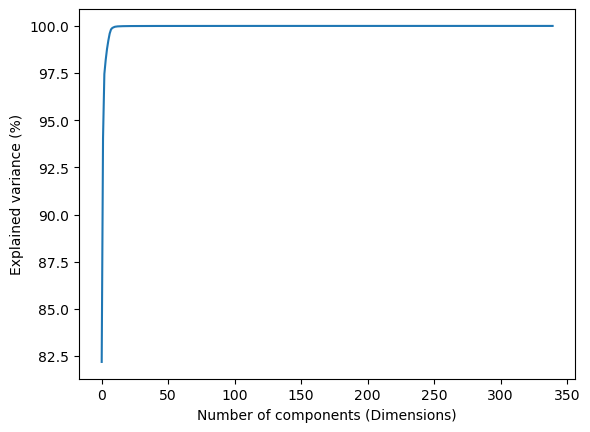

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None, random_state=375)

pca.fit(x_train_fin)

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [106]:
missing_values_count = x_train_fin.isnull().sum()
missing_variables = missing_values_count[missing_values_count > 0].index.tolist()
print("Variables with missing values:", missing_variables)


Variables with missing values: ['transaction_sqrt']
